# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys1 import weather_api_key1

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:50]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # STEP 1:
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key1}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # city_weather = requests.get(city_url).json()
        
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Step 5: Extraction
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        city_pressure = city_weather.get("main", {}).get("pressure") # lol booth extra bonus line

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Pressure": city_pressure,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

    # sleep for 1 second
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | yenagoa
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | hami
Processing Record 7 of Set 1 | mount gambier
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | forio
Processing Record 10 of Set 1 | flying fish cove
Processing Record 11 of Set 1 | constantia
Processing Record 12 of Set 1 | yemva
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | island harbour
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | nemuro
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | albany
Pr

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          50
Lat           50
Lng           50
Max Temp      50
Humidity      50
Pressure      50
Cloudiness    50
Wind Speed    50
Country       50
Date          50
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,14.50,85,1031,40,8.95,RU,1728675771
1,ribeira grande,38.5167,-28.7000,64.80,63,1016,40,1.99,PT,1728675773
2,yenagoa,4.9247,6.2642,76.30,94,1013,100,4.47,NG,1728675775
3,waitangi,-43.9535,-176.5597,49.82,83,1018,100,11.01,NZ,1728675778
4,adamstown,-25.0660,-130.1015,70.45,87,1024,66,12.75,PN,1728675780


In [34]:
# Export the City_Data into a csv
df.to_csv("../output_data/cities_booth.csv", index_label="City_ID")

In [35]:
# Read saved data
df = pd.read_csv("../output_data/cities_booth.csv", index_col="City_ID")

# Display sample data
df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
0,0,anadyr,64.7500,177.4833,14.50,85,1031,40,8.95,RU,1728675771
1,1,ribeira grande,38.5167,-28.7000,64.80,63,1016,40,1.99,PT,1728675773
2,2,yenagoa,4.9247,6.2642,76.30,94,1013,100,4.47,NG,1728675775
3,3,waitangi,-43.9535,-176.5597,49.82,83,1018,100,11.01,NZ,1728675778
4,4,adamstown,-25.0660,-130.1015,70.45,87,1024,66,12.75,PN,1728675780


In [36]:
#clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID.1   50 non-null     int64  
 1   City        50 non-null     object 
 2   Lat         50 non-null     float64
 3   Lng         50 non-null     float64
 4   Max Temp    50 non-null     float64
 5   Humidity    50 non-null     int64  
 6   Pressure    50 non-null     int64  
 7   Cloudiness  50 non-null     int64  
 8   Wind Speed  50 non-null     float64
 9   Country     50 non-null     object 
 10  Date        50 non-null     int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 4.7+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

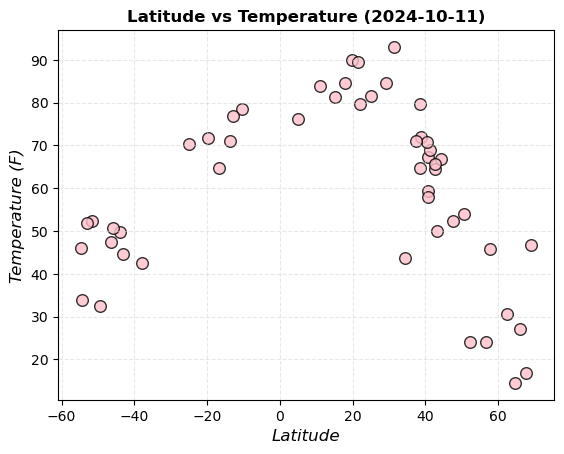

In [67]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    df["Lat"],            
    df["Max Temp"],       
    edgecolor="black",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities",
    facecolor="pink",
    s=70
)

# Incorporate graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=12, fontstyle="italic")
plt.title(f"Latitude vs Temperature ({time.strftime('%Y-%m-%d')})", fontweight="bold", fontsize=12)

#customize
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure (make sure the directory exists)
plt.savefig("../output_data/Fig1_PROF.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

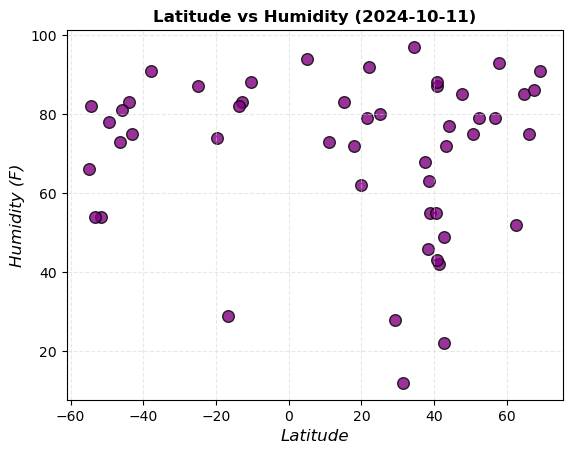

In [68]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    df["Lat"],            
    df["Humidity"],       
    edgecolor="black",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities",
    facecolor="purple",
    s=70
)

# Incorporate graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity (F)", fontsize=12, fontstyle="italic")
plt.title(f"Latitude vs Humidity ({time.strftime('%Y-%m-%d')})", fontweight="bold", fontsize=12)

#customize
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure (make sure the directory exists)
plt.savefig("../output_data/Fig1_PROF.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

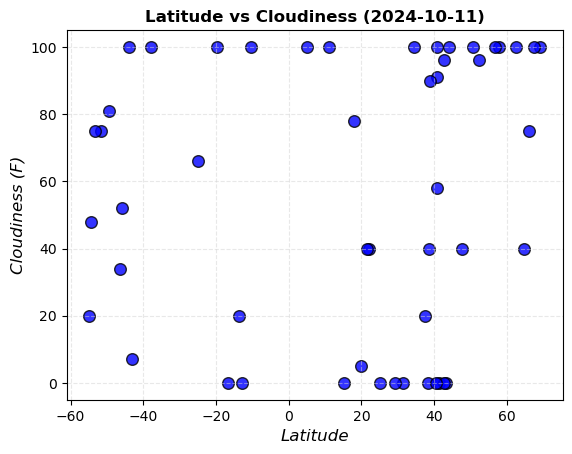

In [69]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    df["Lat"],            
    df["Cloudiness"],       
    edgecolor="black",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities",
    facecolor="blue",
    s=70
)

# Incorporate graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness (F)", fontsize=12, fontstyle="italic")
plt.title(f"Latitude vs Cloudiness ({time.strftime('%Y-%m-%d')})", fontweight="bold", fontsize=12)

#customize
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure (make sure the directory exists)
plt.savefig("../output_data/Fig1_PROF.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

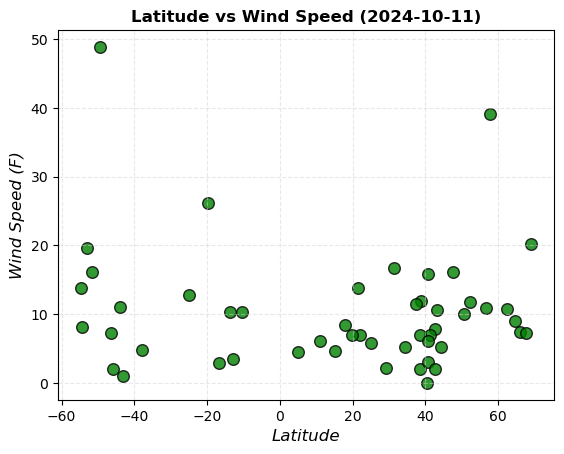

In [71]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    df["Lat"],            
    df["Wind Speed"],       
    edgecolor="black",
    linewidth=1,
    marker="o",
    alpha=0.8,
    label="Cities",
    facecolor="green",
    s=70
)

# Incorporate graph properties
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (F)", fontsize=12, fontstyle="italic")
plt.title(f"Latitude vs Wind Speed ({time.strftime('%Y-%m-%d')})", fontweight="bold", fontsize=12)

#customize
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure (make sure the directory exists)
plt.savefig("../output_data/Fig1_PROF.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [141]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_title, y_title, annotation_pos):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Plot
    plt.scatter(x_values, y_values, facecolor="#FF69B4", alpha=0.8, edgecolor="black", s=50)
    plt.xlabel("Latitude")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=12)
    plt.plot(x_values, regress_values, color="red")
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")

    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    print(f"the r value is: {rvalue**2}")  
    plt.show()


In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem_df = df.loc[df.Lat >= 0]

# Display sample data
north_hem_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
0,0,anadyr,64.7500,177.4833,14.50,85,1031,40,8.95,RU,1728675771
1,1,ribeira grande,38.5167,-28.7000,64.80,63,1016,40,1.99,PT,1728675773
2,2,yenagoa,4.9247,6.2642,76.30,94,1013,100,4.47,NG,1728675775
5,5,hami,42.8000,93.4500,64.58,22,1009,96,7.90,CN,1728675782
8,8,forio,40.7342,13.8646,67.42,87,1015,91,3.00,IT,1728675656


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = df.loc[df.Lat < 0]

# Display sample data
south_hem_df.head()

,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
3,3,waitangi,-43.9535,-176.5597,49.82,83,1018,100,11.01,NZ,1728675778
4,4,adamstown,-25.0660,-130.1015,70.45,87,1024,66,12.75,PN,1728675780
6,6,mount gambier,-37.8333,140.7667,42.48,91,1029,100,4.74,AU,1728675784
7,7,port-aux-francais,-49.3500,70.2167,32.47,78,997,81,48.90,TF,1728675787
9,9,flying fish cove,-10.4217,105.6791,78.48,88,1010,100,10.36,CX,1728675768


###  Temperature vs. Latitude Linear Regression Plot

the r value is: 0.7074613663475993


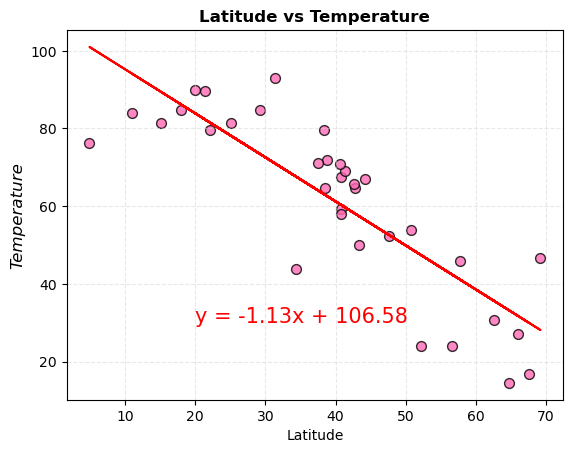

In [142]:
# Linear regression on Northern Hemisphere
x_values = north_hem_df.Lat
y_values = north_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Temperature", (20,30))

the r value is: 0.7891765865226237


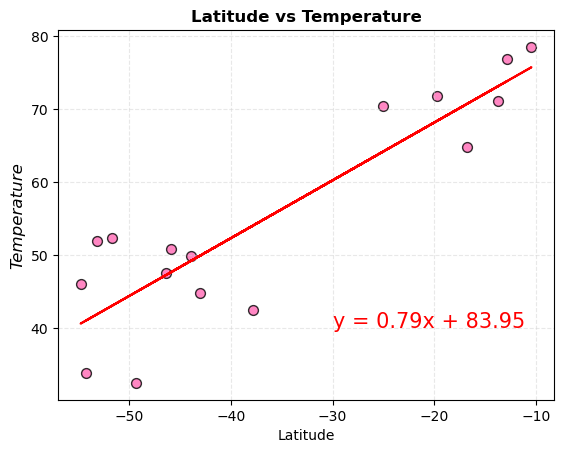

In [143]:
# Linear regression on Southern Hemisphere
x_values = south_hem_df.Lat
y_values = south_hem_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Temperature", (-30,40))

An r-squared value of 0.79 and 0.71 indicate a strong positive correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

the r value is: 0.0047311930353290295


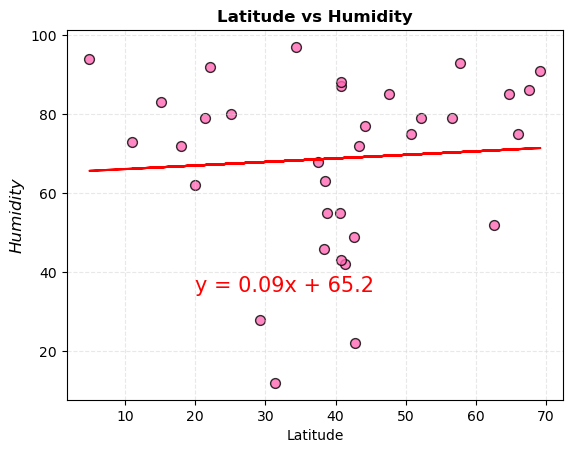

In [144]:
# Northern Hemisphere
x_values = north_hem_df.Lat
y_values = north_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", (20,35))

the r value is: 0.013165223758489433


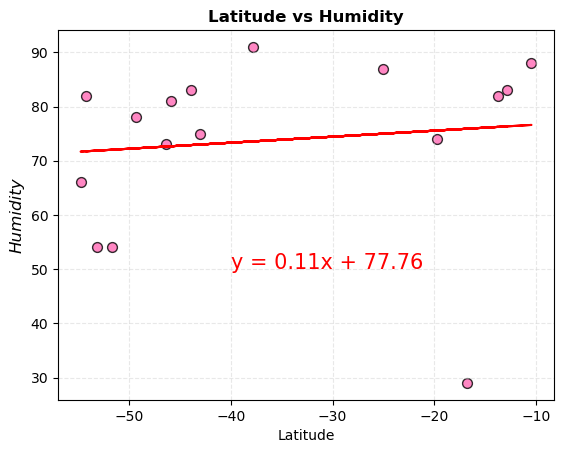

In [145]:
# Southern Hemisphere
x_values = south_hem_df.Lat
y_values = south_hem_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", (-40,50))

An r-squared value of 0.004 and 0.013 for latitude and humidity indicates a very weak or almost no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

the r value is: 0.0987115172457908


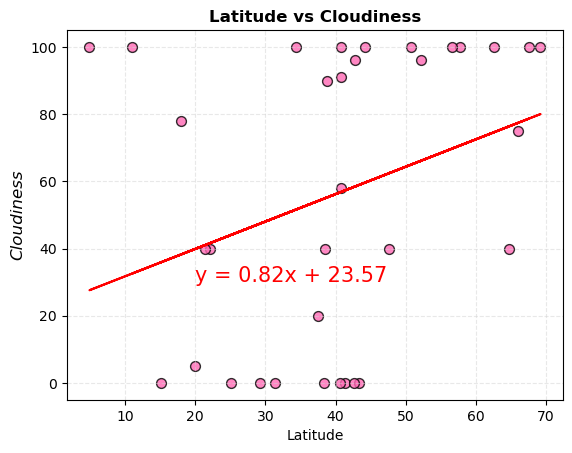

In [146]:
# Northern Hemisphere
x_values = north_hem_df.Lat
y_values = north_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", (20,30))

the r value is: 0.015927263736634792


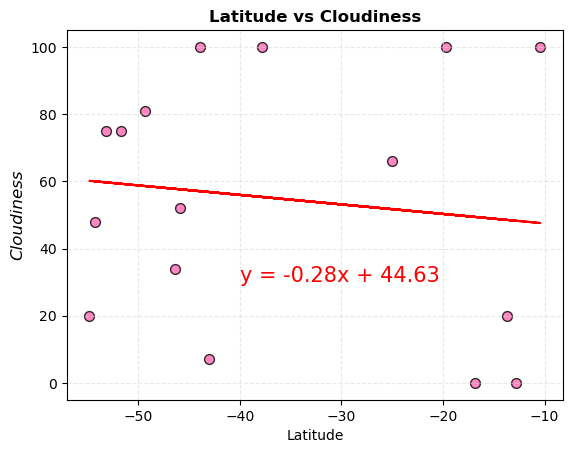

In [147]:
# Southern Hemisphere
x_values = south_hem_df.Lat
y_values = south_hem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", (-40,30))

An r-squared value of 0.099 and 0.016 between cloudiness and latitude indicates a very weak correlation, suggesting little to no relationship between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

the r value is: 0.12019267616082274


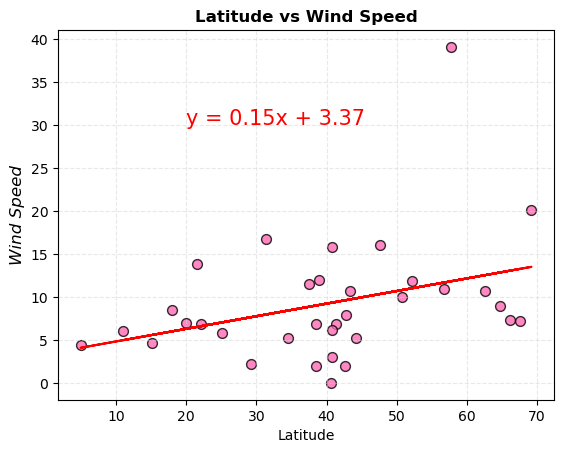

In [150]:
# Northern Hemisphere
x_values = north_hem_df.Lat
y_values = north_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (20,30))

the r value is: 0.0429378424381757


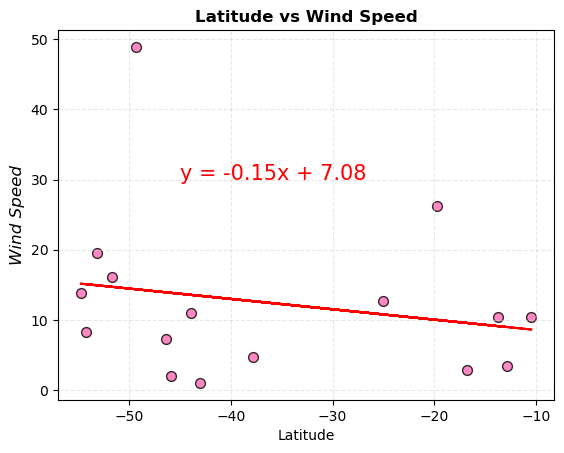

In [149]:
# Southern Hemisphere
x_values = south_hem_df.Lat
y_values = south_hem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (-45,30))

An r-squared value of 0.120 and 0.043 between wind speed and latitude indicates a weak correlation, suggesting a minimal relationship between the two variables. However, the northern hemisphere is notably higher than the south.